In [4]:
# Size of file cache: 
#    Note that the file cache size is determined by the OS and will be sensitive to other load 
#    on the machine; for an application accessing lots of file system data, an OS will use a 
#    notable fraction of main memory (GBs) for the file system cache. Report results as a graph 
#    whose x-axis is the size of the file being accessed and the y-axis is the average read I/O 
#    time. Do not use a system call or utility program to determine this metric except to 
#    sanity check.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Read data
with open('data/file_cache_size_data.out') as f:
    raw = f.readlines()

In [20]:
# Process data
num_lines = len(raw)

x = 1024 * np.arange(num_lines) + 1
y = []

for line in raw:
    s = line.split()[2]
    i1 = s.index('(') + 1
    i2 = s.index(')')
    y.append(int(s[i1:i2]))

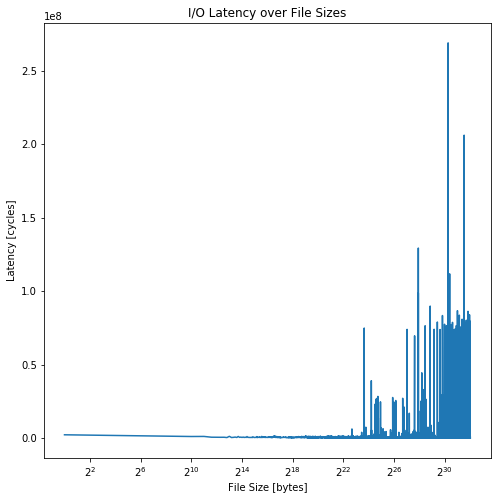

In [23]:
# Plot data
plt.figure(figsize=(8,8))
plt.plot(x, y)
plt.xscale('log', basex=2)
plt.xlabel('File Size [bytes]')
plt.ylabel('Latency [cycles]')
plt.title('I/O Latency over File Sizes')
plt.savefig('data/pointwise_backward.png')
plt.show()

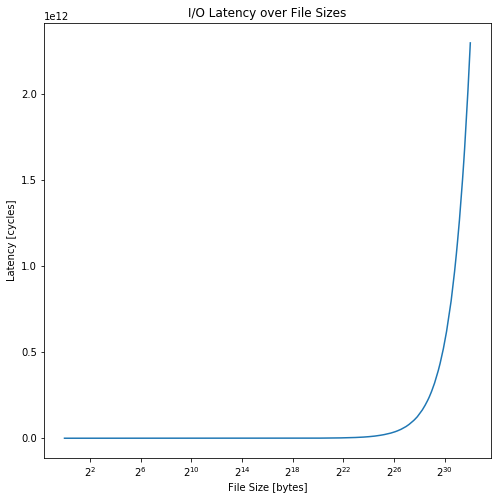

In [24]:
# Plot averaged data
plt.figure(figsize=(8,8))
plt.plot(x, np.cumsum(y))
plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xlabel('File Size [bytes]')
plt.ylabel('Latency [cycles]')
plt.title('I/O Latency over File Sizes')
plt.savefig('data/cumulative_backward.png')
plt.show()